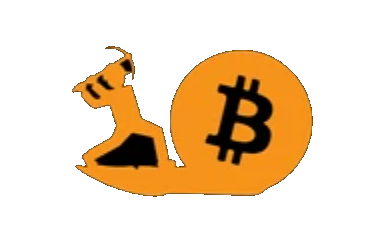

In [12]:
#Load Dependencies
from IPython.core.display import HTML
from IPython.display import Image, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from hashlib import sha256
from time import time
from random import getrandbits, random, randint

Image(filename='Logo.png', width = 200) 

In [13]:
#Define Difficulty Select Widget
N_Zeros_Widget = widgets.IntSlider(
    value = 5,
    min = 1,
    max = 7,
    step = 1,
    description = '<b>Difficulty<b>',
    continuous_update = False)

In [7]:
#Create Block Content
display(HTML('<h3>Block Content:<h3>'))
Block = "<h4>Block Id : " + str(str(getrandbits(16))).zfill(10) + "<br><br> Previous Nonce : 2141580626 <br> Previous Hash : 00000a75bb4bf7a596924200262f5d6425f8cf29fff2c096e97e06e22e27cc9a <br><br>"

N_Transactions = randint(50, 500)
for N in range(N_Transactions):
    Amount = round(1*random(), 5)
    Id = 'Transaction Id : ' + str(N + 1).zfill(10) + '<br>'
    Adress_1 = '0x' + str(sha256((Block + str(getrandbits(32))).encode('utf-8')).hexdigest())
    Adress_2 = '0x' + str(sha256((Block + str(getrandbits(32))).encode('utf-8')).hexdigest())
    From = 'From : ' + Adress_1 + '<br>'
    To = 'To : ' +  Adress_2  + '<br>'
    Amount = 'Amount : ' + str(Amount) + ' BTC<br>'
    Sep = '--<br>'
    if N != N_Transactions - 1:
        Block += Id + From + To + Amount
    else:
        Block += Id + From + To + Amount + '<h4>'
    
display(HTML('<br>'.join(Block.split('<br>')[:9]) + '<br><br>...<br><br>' + '<br>'.join(Block.split('<br>')[-5:])))

In [8]:
#Mining Algorithm
def Mine(N_Zeros):
    Zeros_String = '0'*N_Zeros
    Hash = '48579a75bb4bf7a596924200262f5d6425f8cf29fff2c096e97e06e22e27cc9a' # Initialize hash
    Attempts = 0
    Red = '<font color="darkred">'
    Black = '<font color="white">'

    Start_Time = time()
    while Hash[:N_Zeros] != Zeros_String:        
        Attempts += 1
        Nonce = str(getrandbits(32))
        Hash = str(sha256((Block + Nonce).encode('utf-8')).hexdigest())
        
        if Attempts % 10000 == 0:
            display(HTML('<h4>' + str(Attempts) + ' Attempts<h4>'))
            display(HTML('<h3>Nonce: ' + str(Nonce) + '<h3>'))
            display(HTML('<h3>Hash: ' + Red + Hash[:N_Zeros] + '</mark>' + Black + Hash[N_Zeros:] + '</mark><h3>'))
            clear_output(wait = True)
        
    End_Time = time()
    Duration = End_Time - Start_Time

    # Red = '<h3><font color=red>'
    # Black = '<h3><font color=black>'

    display(HTML('<h3>Block Mined in ' + str(Attempts) + ' attempts and ' + str(int(round(Duration))) + ' seconds<h3><h3>'))
    display(HTML('<h3>Nonce: ' + str(Nonce) + '<h3>'))
    display(HTML('<h3>Hash: ' + Red + Hash[:N_Zeros] + '</mark>' + Black + Hash[N_Zeros:] + '</mark><h3>'))
    
Interact = interact_manual.options(manual_name = "Mine Block")
Interact(Mine, N_Zeros = N_Zeros_Widget);

interactive(children=(IntSlider(value=5, continuous_update=False, description='<b>Difficulty<b>', max=7, min=1…